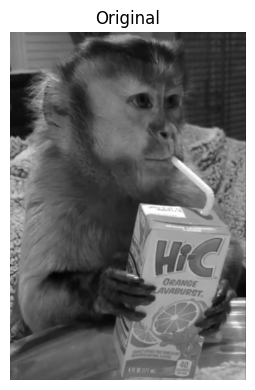

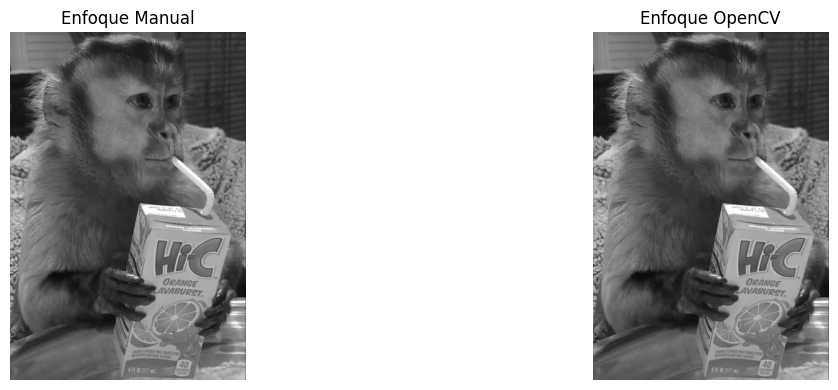

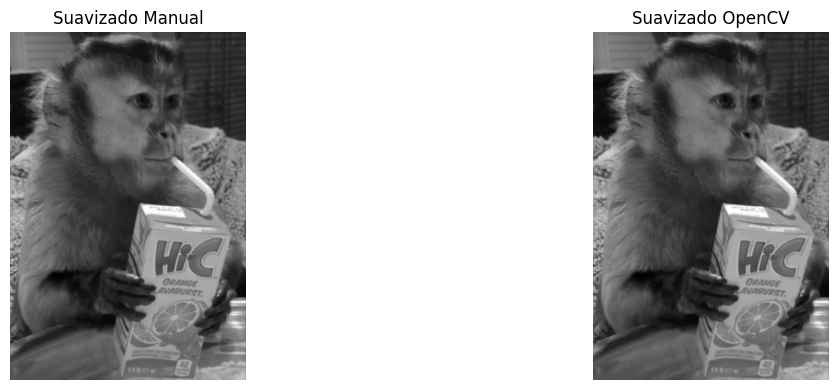

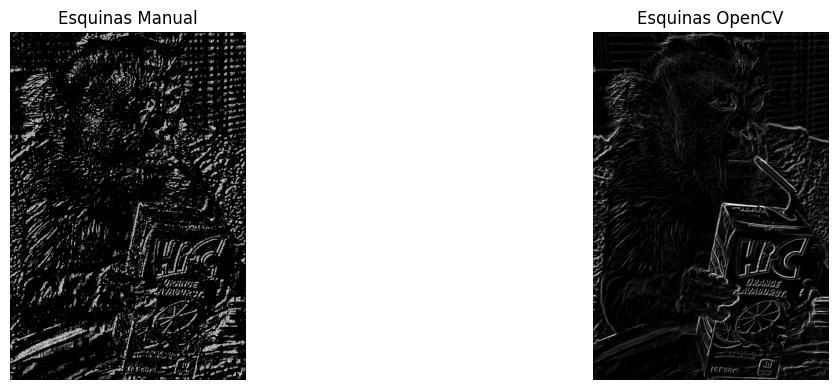

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer imagen en escala de grises
def cargar_imagen(ruta):
    imagen = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
    if imagen is None:
        raise FileNotFoundError("No se pudo cargar la imagen")
    return imagen

# Convolución 2D manual con padding reflectivo
def convolucion_manual(imagen, kernel):
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2
    imagen_padded = np.pad(imagen, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')
    salida = np.zeros_like(imagen, dtype=np.float32)

    for y in range(imagen.shape[0]):
        for x in range(imagen.shape[1]):
            region = imagen_padded[y:y+kh, x:x+kw]
            salida[y, x] = np.sum(region * kernel)

    return np.clip(salida, 0, 255).astype(np.uint8)

# Filtros clásicos definidos manualmente
def kernel_enfoque():
    return np.array([[0, -1, 0],
                     [-1, 5, -1],
                     [0, -1, 0]], dtype=np.float32)

def kernel_promedio():
    return np.ones((3, 3), dtype=np.float32) / 9

def kernel_esquinas():
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]], dtype=np.float32)
    sobel_y = np.array([[-1, -2, -1],
                        [0,  0,  0],
                        [1,  2,  1]], dtype=np.float32)
    return sobel_x, sobel_y

# Mostrar múltiples imágenes lado a lado
def mostrar_resultados(titulos, imagenes):
    plt.figure(figsize=(15, 4))
    for i, (titulo, imagen) in enumerate(zip(titulos, imagenes)):
        plt.subplot(1, len(imagenes), i+1)
        plt.imshow(imagen, cmap='gray')
        plt.title(titulo)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

imagen = cargar_imagen("../datos/mikito.jpg")

img_enfoque = convolucion_manual(imagen, kernel_enfoque())
img_suave = convolucion_manual(imagen, kernel_promedio())
kx, ky = kernel_esquinas()
gx = convolucion_manual(imagen, kx)
gy = convolucion_manual(imagen, ky)
img_esquinas = np.clip((gx * gy)**0.5, 0, 255).astype(np.uint8)

opencv_enfoque = cv2.filter2D(imagen, -1, kernel_enfoque())
opencv_suave = cv2.filter2D(imagen, -1, kernel_promedio())
opencv_esquinas = cv2.filter2D(imagen, -1, kx) + cv2.filter2D(imagen, -1, ky)

mostrar_resultados(
    ["Original"],
    [imagen]
)
mostrar_resultados(
    ["Enfoque Manual", "Enfoque OpenCV"],
    [img_enfoque, opencv_enfoque]
)
mostrar_resultados(
    ["Suavizado Manual", "Suavizado OpenCV"],
    [img_suave, opencv_suave]
)
mostrar_resultados(
    ["Esquinas Manual", "Esquinas OpenCV"],
    [img_esquinas, opencv_esquinas]
)